In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory containing the data
data_dir = './data/20240918/'

# List all files in the directory
files = os.listdir(data_dir)

# Specify the files you want to plot
files_to_plot = ['eqe1-030-p1-cm1.csv', 'eqe1-030-p1-cm2.csv', 'eqe2-030-p1-cm1.csv', 
                 'eqe2-030-p1-cm2.csv', 'eqe3-030-p1-cm1.csv', 'eqe3-030-p1-cm2.csv']  # Add the filenames you want to plot

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Loop through each file and read the data into the DataFrame
for file in files:
    if file in files_to_plot:
        file_path = os.path.join(data_dir, file)
        if file.endswith('.csv'):
            df = pd.read_csv(file_path)
            plt.plot(df['Wavelength (nm)'], df['Current (A)'], label=file)

# Plot the data
plt.figure(figsize=(10, 6))
for file in files_to_plot:
    file_path = os.path.join(data_dir, file)
    if file.endswith('.csv'):
        df = pd.read_csv(file_path)
        plt.plot(df['Wavelength (nm)'], df['Current (A)'], label=file)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Current (A)')
plt.title('Selected Data from ./data/20240918/')
plt.legend()
plt.show()

KeyError: 'Current (A)'

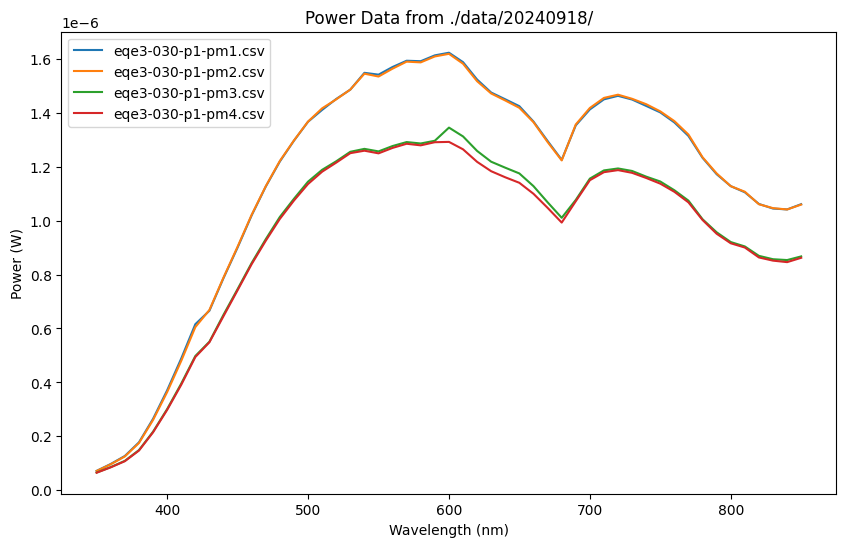

In [16]:
import os
import pandas as pd

import matplotlib.pyplot as plt

# Define the directory containing the data
data_dir = './data/20240918/'

# List all files in the directory
files = os.listdir(data_dir)

# Filter the files to include only those that match the pattern 'eqe3-00-p1-*.csv'
files_to_plot = [file for file in files if file.startswith('eqe3-030-p1-pm') and file.endswith('.csv')]

# Initialize an empty DataFrame to store the data
data = pd.DataFrame()

# Plot the data
plt.figure(figsize=(10, 6))
for file in files_to_plot:
    file_path = os.path.join(data_dir, file)
    df = pd.read_csv(file_path)
    plt.plot(df['Wavelength (nm)'], df['Power (W)'], label=file)

plt.xlabel('Wavelength (nm)')
plt.ylabel('Power (W)')
plt.title('Power Data from ./data/20240918/')
plt.legend()
plt.show()

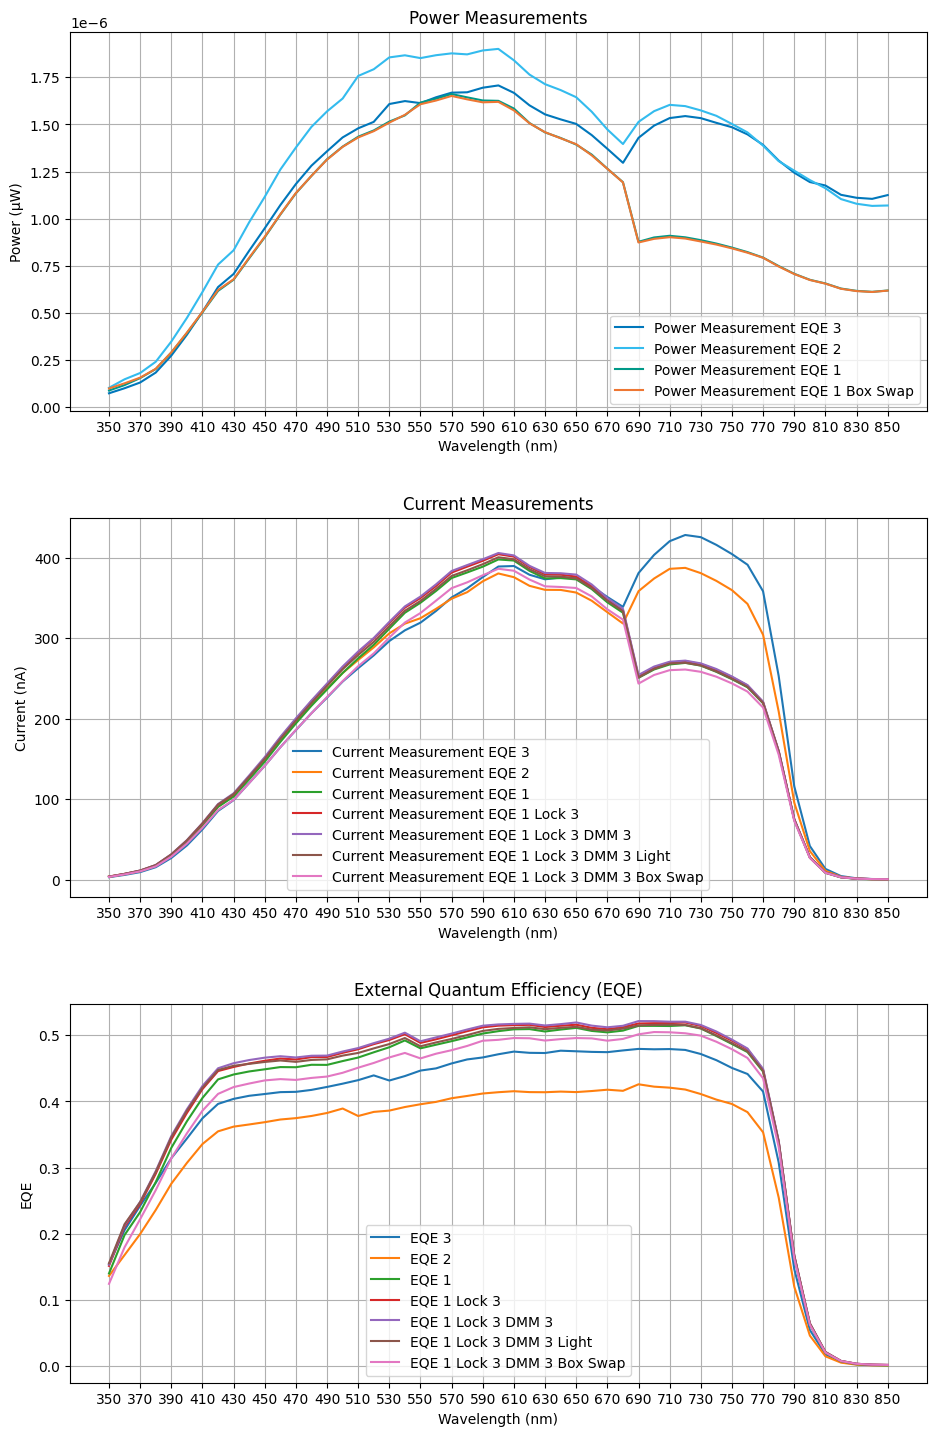

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.62607015e-34  # Planck's constant (Joule second)
c = 3.0e8  # Speed of light (meters per second)
e = 1.602176634e-19  # Elementary charge (Coulombs)

# List of power data files
power_files = [
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240918/eqe3-030-p3-pm1.csv',
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe2-030-p3-pm1.csv',
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-pm1.csv',
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-pm2-head.csv'
]

# Read the power data from the CSV files
power_data_dict = {f'power_{i+1}': pd.read_csv(file) for i, file in enumerate(power_files)}

# List of current data files and their associated power data keys
current_files = [
    #('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240918/eqe1-030-p3-cm1-jack.csv', 'power_1'),
    #('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240918/eqe2-030-p3-cm2-jack.csv', 'power_1'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240918/eqe3-030-p3-cm3-jack.csv', 'power_1'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe2-030-p3-cm1-jack.csv', 'power_2'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm1-jack.csv', 'power_3'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm2-jack-lock3.csv', 'power_3'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm2-jack-lock3-dmm3.csv', 'power_3'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm2-jack-lock3-dmm3-light.csv', 'power_3'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm3-jack-lock3-dmm3-head.csv', 'power_4')

]

# Colors for the power curves
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311']

# Labels for the power curves
power_labels = [
    'Power Measurement EQE 3',
    'Power Measurement EQE 2',
    'Power Measurement EQE 1',
    'Power Measurement EQE 1 Box Swap'
]

# Labels for the current curves
current_labels = [
    'Current Measurement EQE 3',
    'Current Measurement EQE 2',
    'Current Measurement EQE 1',
    'Current Measurement EQE 1 Lock 3',
    'Current Measurement EQE 1 Lock 3 DMM 3',
    'Current Measurement EQE 1 Lock 3 DMM 3 Light',
    'Current Measurement EQE 1 Lock 3 DMM 3 Box Swap'
]
''
# Labels for the EQE curves
eqe_labels = [
    'EQE 3',
    'EQE 2',
    'EQE 1',
    'EQE 1 Lock 3',
    'EQE 1 Lock 3 DMM 3',
    'EQE 1 Lock 3 DMM 3 Light',
    'EQE 1 Lock 3 DMM 3 Box Swap'
]

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Power Measurements
for i, (key, power_data) in enumerate(power_data_dict.items()):
    axs[0].plot(power_data['Wavelength (nm)'], power_data['Power (W)'], '-', color=colors[i % len(colors)], label=power_labels[i % len(power_labels)])
axs[0].set_title('Power Measurements')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Power (μW)')
axs[0].grid(True)
axs[0].set_xticks(np.arange(min(power_data['Wavelength (nm)']), max(power_data['Wavelength (nm)']) + 1, 20))
axs[0].legend()

# Loop through each current data file
for i, (current_file, power_key) in enumerate(current_files):
    # Read the current data from the CSV file
    current_data = pd.read_csv(current_file)
    
    # Get the corresponding power data
    power_data = power_data_dict[power_key]
    
    # Calculate the EQE
    wavelength_meters = current_data['Wavelength (nm)'] * 1e-9  # Convert nm to meters
    eqe = (current_data['Current (A)'] / power_data['Power (W)']) * (h * c / (e * wavelength_meters))
    
    # Plot Current Measurements
    axs[1].plot(current_data['Wavelength (nm)'], current_data['Current (A)'] * 1e9, label=current_labels[i % len(current_labels)])
    
    # Plot EQE
    axs[2].plot(current_data['Wavelength (nm)'], eqe, label=eqe_labels[i % len(eqe_labels)])

# Set titles and labels for Current Measurements plot
axs[1].set_title('Current Measurements')
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Current (nA)')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(np.arange(min(current_data['Wavelength (nm)']), max(current_data['Wavelength (nm)']) + 1, 20))

# Set titles and labels for EQE plot
axs[2].set_title('External Quantum Efficiency (EQE)')
axs[2].set_xlabel('Wavelength (nm)')
axs[2].set_ylabel('EQE')
axs[2].legend()
axs[2].grid(True)
axs[2].set_xticks(np.arange(min(current_data['Wavelength (nm)']), max(current_data['Wavelength (nm)']) + 1, 20))

# Adjust layout with padding
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()

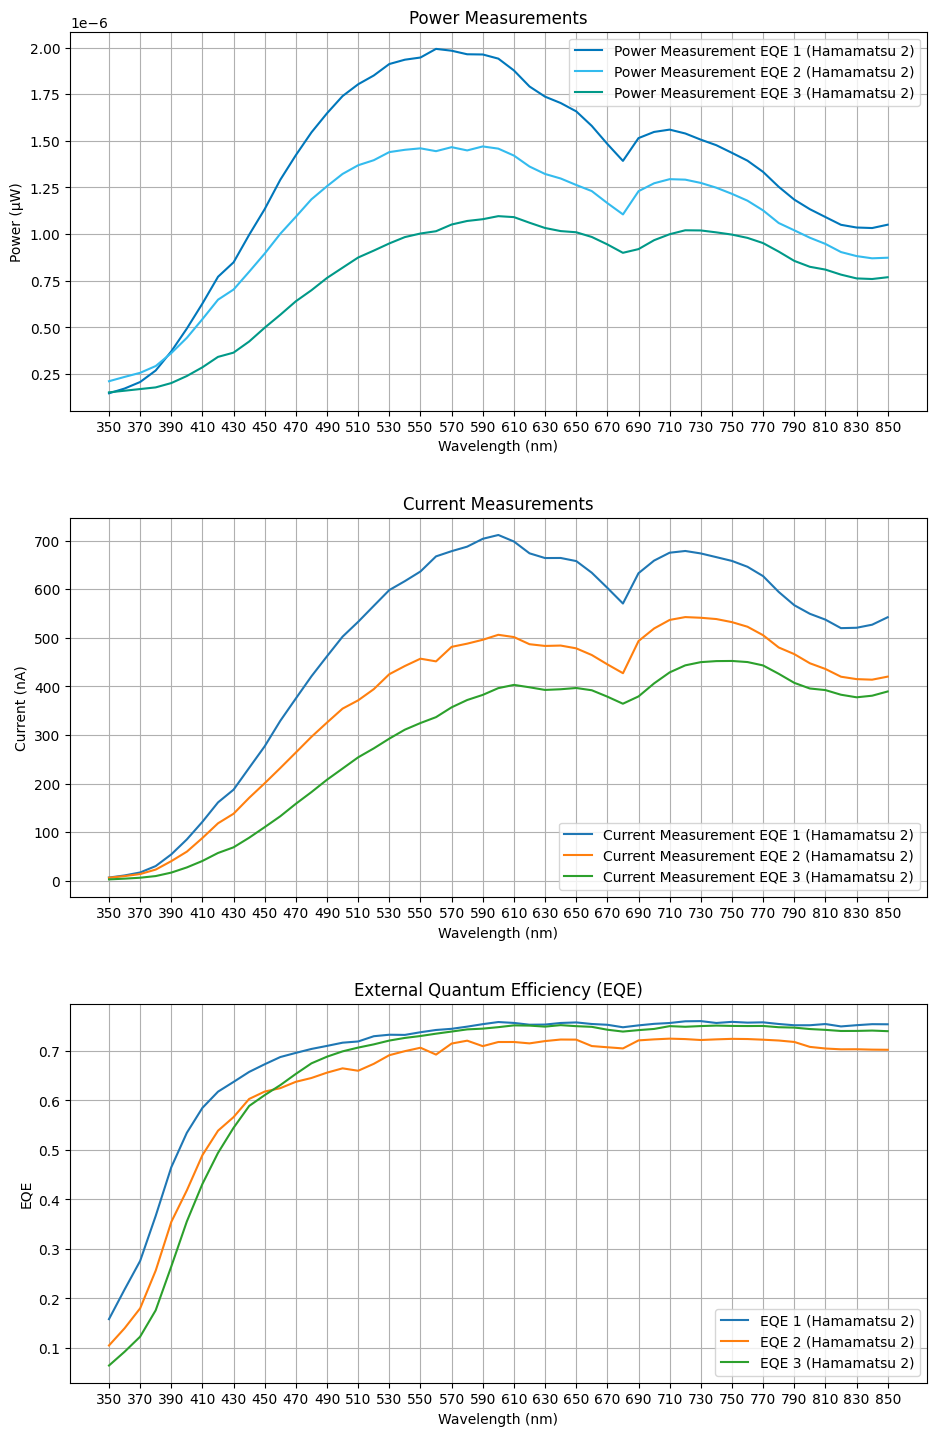

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.62607015e-34  # Planck's constant (Joule second)
c = 3.0e8  # Speed of light (meters per second)
e = 1.602176634e-19  # Elementary charge (Coulombs)

# List of power data files
power_files = [
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241003/hama/eqe1-hama2-pm1.csv',
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241003/hama/eqe2-hama2-pm1.csv',
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241003/hama/eqe3-hama2-pm1.csv'
]

# Read the power data from the CSV files
power_data_dict = {f'power_{i+1}': pd.read_csv(file) for i, file in enumerate(power_files)}

# List of current data files and their associated power data keys
current_files = [
    #('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240918/eqe1-030-p3-cm1-jack.csv', 'power_1'),
    #('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240918/eqe2-030-p3-cm2-jack.csv', 'power_1'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241003/hama/eqe1-hama2-cm1.csv', 'power_1'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241003/hama/eqe2-hama2-cm1.csv', 'power_2'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241003/hama/eqe3-hama2-cm1.csv', 'power_3')
    # ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm1-jack.csv', 'power_3'),
    # ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm2-jack-lock3.csv', 'power_3'),
    # ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm2-jack-lock3-dmm3.csv', 'power_3'),
    # ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm2-jack-lock3-dmm3-light.csv', 'power_3'),
    # ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm3-jack-lock3-dmm3-head.csv', 'power_4')

]

# Colors for the power curves
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311']

# Labels for the power curves
power_labels = [
    'Power Measurement EQE 1 (Hamamatsu 2)',
    'Power Measurement EQE 2 (Hamamatsu 2)',
    'Power Measurement EQE 3 (Hamamatsu 2)'
]

# Labels for the current curves
current_labels = [
    'Current Measurement EQE 1 (Hamamatsu 2)',
    'Current Measurement EQE 2 (Hamamatsu 2)',
    'Current Measurement EQE 3 (Hamamatsu 2)'
]
''
# Labels for the EQE curves
eqe_labels = [
    'EQE 1 (Hamamatsu 2)',
    'EQE 2 (Hamamatsu 2)',
    'EQE 3 (Hamamatsu 2)'
]

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Power Measurements
for i, (key, power_data) in enumerate(power_data_dict.items()):
    axs[0].plot(power_data['Wavelength (nm)'], power_data['Power (W)'], '-', color=colors[i % len(colors)], label=power_labels[i % len(power_labels)])
axs[0].set_title('Power Measurements')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Power (μW)')
axs[0].grid(True)
axs[0].set_xticks(np.arange(min(power_data['Wavelength (nm)']), max(power_data['Wavelength (nm)']) + 1, 20))
axs[0].legend()

# Loop through each current data file
for i, (current_file, power_key) in enumerate(current_files):
    # Read the current data from the CSV file
    current_data = pd.read_csv(current_file)
    
    # Get the corresponding power data
    power_data = power_data_dict[power_key]
    
    # Calculate the EQE
    wavelength_meters = current_data['Wavelength (nm)'] * 1e-9  # Convert nm to meters
    eqe = (current_data['Current (A)'] / power_data['Power (W)']) * (h * c / (e * wavelength_meters))
    
    # Plot Current Measurements
    axs[1].plot(current_data['Wavelength (nm)'], current_data['Current (A)'] * 1e9, label=current_labels[i % len(current_labels)])
    
    # Plot EQE
    axs[2].plot(current_data['Wavelength (nm)'], eqe, label=eqe_labels[i % len(eqe_labels)])

# Set titles and labels for Current Measurements plot
axs[1].set_title('Current Measurements')
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Current (nA)')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(np.arange(min(current_data['Wavelength (nm)']), max(current_data['Wavelength (nm)']) + 1, 20))

# Set titles and labels for EQE plot
axs[2].set_title('External Quantum Efficiency (EQE)')
axs[2].set_xlabel('Wavelength (nm)')
axs[2].set_ylabel('EQE')
axs[2].legend()
axs[2].grid(True)
axs[2].set_xticks(np.arange(min(current_data['Wavelength (nm)']), max(current_data['Wavelength (nm)']) + 1, 20))

# Adjust layout with padding
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()

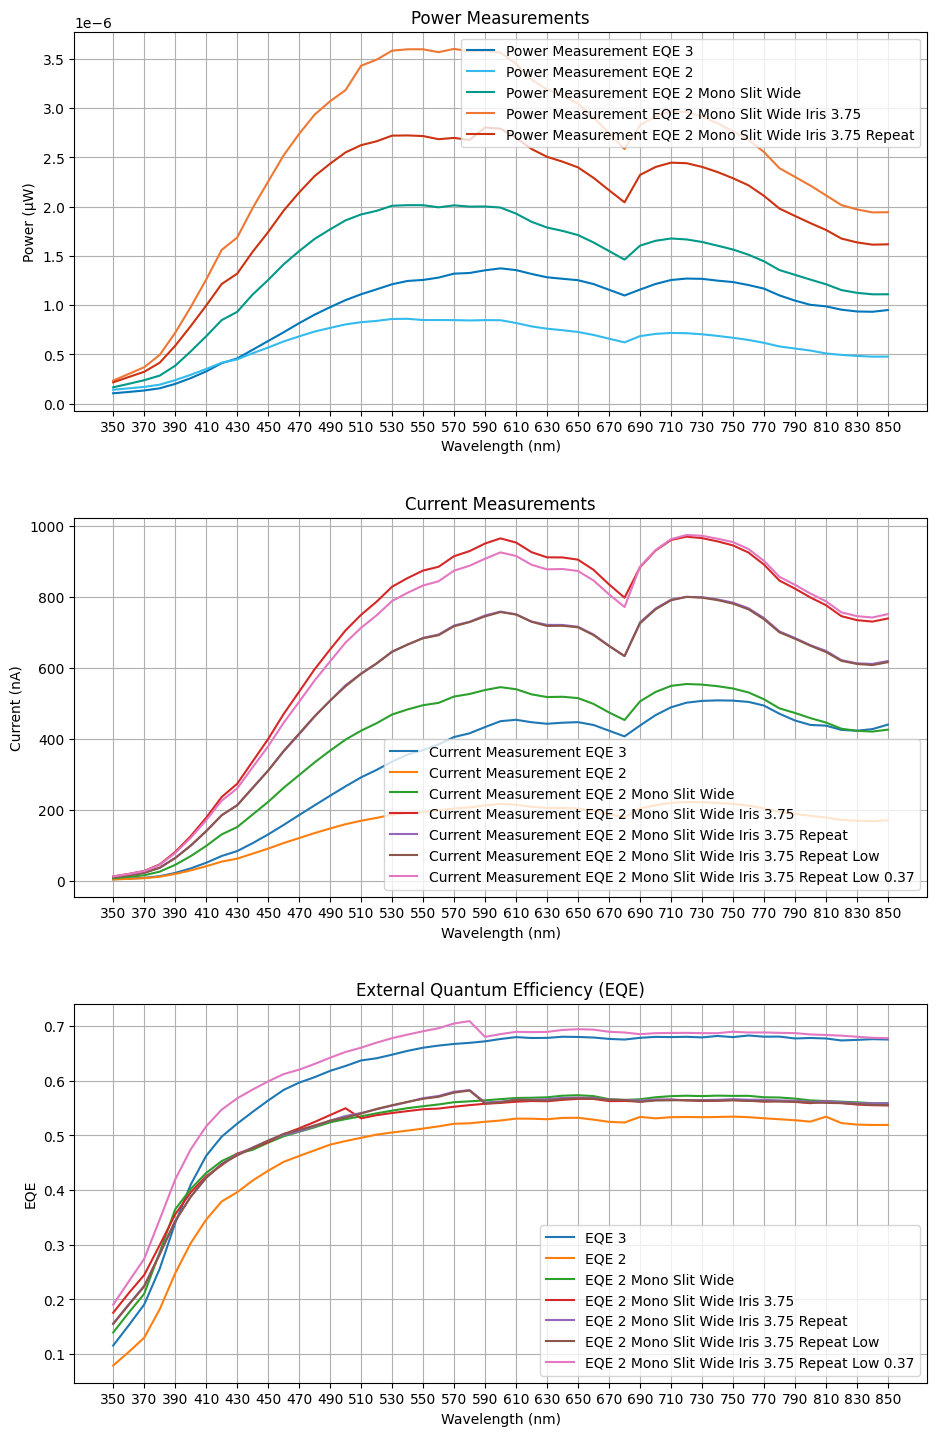

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.62607015e-34  # Planck's constant (Joule second)
c = 3.0e8  # Speed of light (meters per second)
e = 1.602176634e-19  # Elementary charge (Coulombs)

# List of power data files
power_files = [
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe3-hama1-pm1.csv',
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe2-hama1-pm1.csv',
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe2-hama1-pm2.csv',
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe2-hama1-pm3.csv',
    'c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe2-hama1-pm4.csv'
]

# Read the power data from the CSV files
power_data_dict = {f'power_{i+1}': pd.read_csv(file) for i, file in enumerate(power_files)}

# List of current data files and their associated power data keys
current_files = [
    #('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240918/eqe1-030-p3-cm1-jack.csv', 'power_1'),
    #('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240918/eqe2-030-p3-cm2-jack.csv', 'power_1'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe3-hama1-cm1.csv', 'power_1'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe2-hama1-cm1.csv', 'power_2'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe2-hama1-cm2.csv', 'power_3'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe2-hama1-cm3.csv', 'power_4'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe2-hama1-cm4.csv', 'power_5'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe2-hama1-cm5.csv', 'power_5'),
    ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20241001/small-dot/eqe2-hama1-cm6.csv', 'power_5'),
    # ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm1-jack.csv', 'power_3'),
    # ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm2-jack-lock3.csv', 'power_3'),
    # ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm2-jack-lock3-dmm3.csv', 'power_3'),
    # ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm2-jack-lock3-dmm3-light.csv', 'power_3'),
    # ('c:/Users/krist/Documents/GitHub/PHYS-2150/eqe/data/20240919/eqe1-030-p3-cm3-jack-lock3-dmm3-head.csv', 'power_4')

]

# Colors for the power curves
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']

# Labels for the power curves
power_labels = [
    'Power Measurement EQE 3',
    'Power Measurement EQE 2',
    'Power Measurement EQE 2 Mono Slit Wide',
    'Power Measurement EQE 2 Mono Slit Wide Iris 3.75',
    'Power Measurement EQE 2 Mono Slit Wide Iris 3.75 Repeat',
    'Power Measurement EQE 2 Mono Slit Wide Iris 3.75 Repeat Low',
    'Power Measurement EQE 2 Mono Slit Wide Iris 3.75 Repeat Low 0.37',
    'Power Measurement EQE 1'
]

# Labels for the current curves
current_labels = [
    'Current Measurement EQE 3',
    'Current Measurement EQE 2',
    'Current Measurement EQE 2 Mono Slit Wide',
    'Current Measurement EQE 2 Mono Slit Wide Iris 3.75',
    'Current Measurement EQE 2 Mono Slit Wide Iris 3.75 Repeat',
    'Current Measurement EQE 2 Mono Slit Wide Iris 3.75 Repeat Low',
    'Current Measurement EQE 2 Mono Slit Wide Iris 3.75 Repeat Low 0.37',
    'Current Measurement EQE 1'
]
''
# Labels for the EQE curves
eqe_labels = [
    'EQE 3',
    'EQE 2',
    'EQE 2 Mono Slit Wide',
    'EQE 2 Mono Slit Wide Iris 3.75',
    'EQE 2 Mono Slit Wide Iris 3.75 Repeat',
    'EQE 2 Mono Slit Wide Iris 3.75 Repeat Low',
    'EQE 2 Mono Slit Wide Iris 3.75 Repeat Low 0.37',
    'EQE 1'
]

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Power Measurements
for i, (key, power_data) in enumerate(power_data_dict.items()):
    axs[0].plot(power_data['Wavelength (nm)'], power_data['Power (W)'], '-', color=colors[i % len(colors)], label=power_labels[i % len(power_labels)])
axs[0].set_title('Power Measurements')
axs[0].set_xlabel('Wavelength (nm)')
axs[0].set_ylabel('Power (μW)')
axs[0].grid(True)
axs[0].set_xticks(np.arange(min(power_data['Wavelength (nm)']), max(power_data['Wavelength (nm)']) + 1, 20))
axs[0].legend()

# Loop through each current data file
for i, (current_file, power_key) in enumerate(current_files):
    # Read the current data from the CSV file
    current_data = pd.read_csv(current_file)
    
    # Get the corresponding power data
    power_data = power_data_dict[power_key]
    
    # Calculate the EQE
    wavelength_meters = current_data['Wavelength (nm)'] * 1e-9  # Convert nm to meters
    eqe = (current_data['Current (A)'] / power_data['Power (W)']) * (h * c / (e * wavelength_meters))
    
    # Plot Current Measurements
    axs[1].plot(current_data['Wavelength (nm)'], current_data['Current (A)'] * 1e9, label=current_labels[i % len(current_labels)])
    
    # Plot EQE
    axs[2].plot(current_data['Wavelength (nm)'], eqe, label=eqe_labels[i % len(eqe_labels)])

# Set titles and labels for Current Measurements plot
axs[1].set_title('Current Measurements')
axs[1].set_xlabel('Wavelength (nm)')
axs[1].set_ylabel('Current (nA)')
axs[1].legend()
axs[1].grid(True)
axs[1].set_xticks(np.arange(min(current_data['Wavelength (nm)']), max(current_data['Wavelength (nm)']) + 1, 20))

# Set titles and labels for EQE plot
axs[2].set_title('External Quantum Efficiency (EQE)')
axs[2].set_xlabel('Wavelength (nm)')
axs[2].set_ylabel('EQE')
axs[2].legend()
axs[2].grid(True)
axs[2].set_xticks(np.arange(min(current_data['Wavelength (nm)']), max(current_data['Wavelength (nm)']) + 1, 20))

# Adjust layout with padding
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()